In [0]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 39kB/s 
     |████████████████████████████████| 501kB 40.6MB/s 
     |████████████████████████████████| 4.3MB 44.2MB/s 


In [0]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.2.0-rc4'

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
mnist = keras.datasets.fashion_mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
np.max(X_train)

255

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

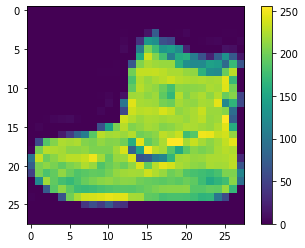

In [9]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

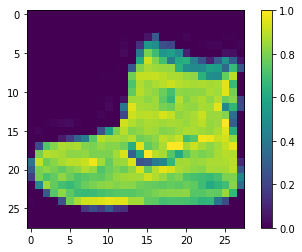

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [0]:
model = Sequential()

In [13]:
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [15]:
history = model.fit(X_train, y_train, epochs=10, batch_size=1000, validation_split = 0.2)

Epoch 1/10
48/48 [==============================] - 1s 19ms/step - loss: 0.9232 - accuracy: 0.6972 - val_loss: 0.5877 - val_accuracy: 0.8036
Epoch 2/10
48/48 [==============================] - 1s 17ms/step - loss: 0.5394 - accuracy: 0.8204 - val_loss: 0.5085 - val_accuracy: 0.8263
Epoch 3/10
48/48 [==============================] - 1s 17ms/step - loss: 0.4766 - accuracy: 0.8366 - val_loss: 0.4683 - val_accuracy: 0.8370
Epoch 4/10
48/48 [==============================] - 1s 17ms/step - loss: 0.4404 - accuracy: 0.8489 - val_loss: 0.4384 - val_accuracy: 0.8500
Epoch 5/10
48/48 [==============================] - 1s 17ms/step - loss: 0.4169 - accuracy: 0.8566 - val_loss: 0.4281 - val_accuracy: 0.8496
Epoch 6/10
48/48 [==============================] - 1s 17ms/step - loss: 0.3996 - accuracy: 0.8613 - val_loss: 0.4051 - val_accuracy: 0.8605
Epoch 7/10
48/48 [==============================] - 1s 17ms/step - loss: 0.3823 - accuracy: 0.8679 - val_loss: 0.3981 - val_accuracy: 0.8624
Epoch 8/10
48

In [16]:
test_loss, test_acc= model.evaluate(X_test, y_test)
print(test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3964 - accuracy: 0.8609
0.8608999848365784


In [0]:
from sklearn.metrics import accuracy_score

In [18]:
y_predict = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [19]:
y_predict

array([9, 2, 1, ..., 8, 1, 5])

In [20]:
accuracy_score(y_test, y_predict)

0.8609

In [21]:
history.history

{'accuracy': [0.6971666812896729,
  0.8204166889190674,
  0.8366458415985107,
  0.8489166498184204,
  0.8565624952316284,
  0.8613333106040955,
  0.8678541779518127,
  0.8716874718666077,
  0.8741458058357239,
  0.8793958425521851],
 'loss': [0.923200249671936,
  0.5394052863121033,
  0.4766158163547516,
  0.4404168426990509,
  0.41694462299346924,
  0.3996281623840332,
  0.38226720690727234,
  0.37012889981269836,
  0.3621959686279297,
  0.3486081063747406],
 'val_accuracy': [0.8035833239555359,
  0.8263333439826965,
  0.8370000123977661,
  0.8500000238418579,
  0.8495833277702332,
  0.8604999780654907,
  0.862416684627533,
  0.8604999780654907,
  0.8633333444595337,
  0.8671666383743286],
 'val_loss': [0.5876776576042175,
  0.5084657073020935,
  0.4682736396789551,
  0.4384114146232605,
  0.4281444847583771,
  0.40513792634010315,
  0.3981472849845886,
  0.399702787399292,
  0.39074838161468506,
  0.376471608877182]}

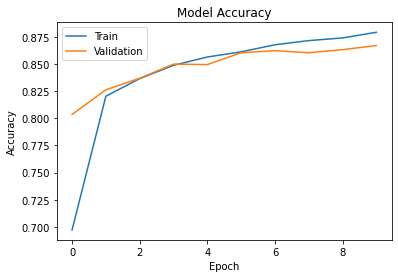

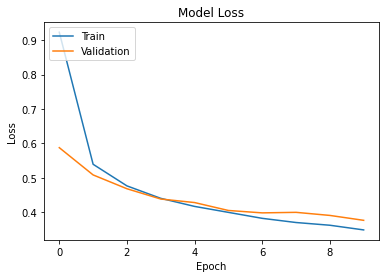

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

In [0]:
from mlxtend.plotting import plot_confusion_matrix

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5695de8588>)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


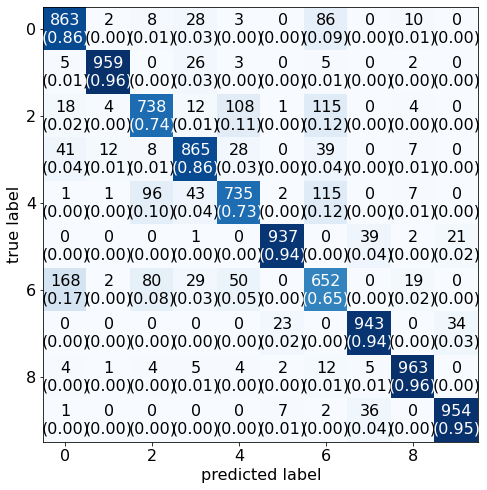

In [25]:
font = {
    'family': 'Times New Roman',
    'size': 16
}
matplotlib.rc('font', **font)
mat = confusion_matrix(y_test, y_predict)
plot_confusion_matrix(conf_mat = mat, figsize = (8,8), show_normed = True)